importações

In [73]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

leitura do csv

In [74]:
df = pd.read_csv('./bi/2022-09-14_dataframe_cotacao.tsv', sep='\t')
df

,Unnamed: 0,Codigo_do_fundo,Setor,Preco_Atual,Liquidez_Diária,Dividendo,DividendYield,DY_(3M)Acumulado,DY_(6M)Acumulado,DY_(12M)Acumulado,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab._Patr.no_Período,Rentab._Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,0,FIVN11,Shoppings,3.14,66915.0,0.00,0.00,0.00,0.00,0.00,...,65.531.708.68,6.96,45.0,0.00,0.00,0.00,0.00,56.00,0.0,1
1,1,BZLI11,Títulos e Val. Mob.,14.70,44041.0,0.00,0.00,0.00,0.00,0.00,...,440.205.505.76,10.78,136.0,0.00,0.00,0.00,0.00,0.00,0.0,0
2,2,XTED11,Lajes Corporativas,6.96,501.0,0.00,0.00,0.00,0.00,0.00,...,27.172.278.20,13.83,50.0,0.00,0.00,0.00,0.00,0.00,100.0,1
3,3,ALMI11,Lajes Corporativas,875.05,7.0,0.00,0.00,0.00,0.00,0.00,...,249.878.508.15,2.247.57,39.0,0.00,0.00,0.00,0.00,64.05,0.0,1
4,4,PABY11,Híbrido,8.11,87.0,0.00,0.00,0.00,0.00,0.00,...,-10.950.151.50,-14.44,-56.0,0.00,0.00,0.00,0.00,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,279,MGHT11,Hotel,68.86,3092.0,0.80,1.16,3.64,6.82,12.02,...,113.860.987.10,86.67,79.0,0.90,-10.30,-9.49,-7.85,0.00,0.0,0
280,280,MCCI11,Títulos e Val. Mob.,98.05,26991.0,1.10,1.12,3.37,6.48,12.40,...,1.411.454.086.46,96.71,101.0,1.14,-0.83,0.30,3.12,0.00,0.0,0
281,281,BRLA11,Híbrido,150.00,334.0,1.09,0.73,1.52,3.69,7.02,...,343.097.427.78,158.19,95.0,0.78,-12.35,-11.67,-10.88,0.00,0.0,0
282,282,MCHF11,Títulos e Val. Mob.,9.73,112072.0,0.11,1.13,3.66,7.01,0.00,...,312.636.898.43,9.68,101.0,1.24,-1.04,0.18,-2.08,0.00,0.0,0


variaveis de leitura do tsv

In [75]:
# variavel para guardar a liquidez
liquidez_valor = df['Liquidez_Diária']
# variavel para guardar os valores das cotas
valor_cota = df['Preco_Atual']

preparando o as listas dos graficos

In [76]:
lista_lq = [] #liquidez_diaria
lista_vc = [] #preço atual
for lq, vc in zip(liquidez_valor,valor_cota):
    try:
        lista_lq.append(lq)
        lista_vc.append(vc)
    except:
        pass

grafico de dispersão

altura referece a liquidez diaria, x referece ao valor da cota

In [77]:
grafico_s_rt = px.scatter(y=lista_lq, x=lista_vc)
grafico_s_rt.show()

In [78]:
rotulo = df['Setor']

In [79]:
lista_lq = [] #liquidez_diaria
lista_vc = [] #preço atual
lista_rt = [] #rotulo
for lq, vc, rt in zip(liquidez_valor,valor_cota, rotulo):
    try:
        lista_lq.append(lq)
        lista_vc.append(vc)
        lista_rt.append(rt)
    except:
        pass

In [80]:
grafico_c_rt = px.scatter(y=lista_lq, x=lista_vc, color=lista_rt)
grafico_c_rt.show()

Transformando em matriz

In [81]:
lista_cotacao = []
for x,y in zip(lista_lq, lista_vc):
    item = [x,y]
    lista_cotacao.append(item)
print(lista_cotacao)

[[66915.0, 3.14], [44041.0, 14.7], [501.0, 6.96], [7.0, 875.05], [87.0, 8.11], [3.0, 93.0], [200.0, 165.0], [15.0, 84.98], [140.0, 375.0], [2750.0, 115.84], [3724.0, 4.49], [14.0, 33.4], [50.0, 113.0], [3.0, 786.0], [1.0, 62.01], [0.0, 0.0], [17261.0, 0.95], [46.0, 3.72], [3.0, 38.0], [10480.0, 45.1], [5495.0, 910.0], [24.0, 1000.0], [433.0, 1.08], [211.0, 81.59], [40.0, 92.79], [68.0, 243.01], [1.0, 87.12], [56.0, 12.79], [300.0, 1520.0], [50.0, 7.14], [5.0, 69.38], [8859.0, 3.98], [0.0, 0.0], [5157.0, 28.45], [83.0, 63.74], [86946.0, 8.04], [6221.0, 85.04], [1924.0, 66.4], [5662.0, 94.98], [0.0, 0.0], [16126.0, 151.36], [611.0, 95.74], [761.0, 73.87], [4848.0, 75.5], [1050.0, 90.68], [1994.0, 78.18], [1.0, 87.58], [6305.0, 101.1], [5161.0, 66.8], [685.0, 84.1], [412.0, 81.0], [11414.0, 103.19], [12966.0, 101.94], [768.0, 91.6], [221.0, 87.5], [15.0, 78.25], [6934.0, 89.15], [11293.0, 101.39], [508.0, 95.98], [41660.0, 103.8], [75.0, 110.57], [8531.0, 101.65], [3117.0, 95.5], [8.0, 97

In [82]:
base_cotacoes = np.array(lista_cotacao)

treino

In [83]:
scaler_base = StandardScaler()
base_cotacoes = scaler_base.fit_transform(base_cotacoes)
base_cotacoes

array([[ 9.39489527e-01, -1.00839573e-01],
       [ 5.10510453e-01, -9.83869190e-02],
       [-3.06038855e-01, -1.00029094e-01],
       [-3.15303333e-01,  8.41512386e-02],
       [-3.13803013e-01, -9.97851016e-02],
       [-3.15378349e-01, -8.17742175e-02],
       [-3.11683810e-01, -6.64981701e-02],
       [-3.15153301e-01, -8.34757994e-02],
       [-3.12809051e-01, -2.19430320e-02],
       [-2.63861102e-01, -7.69283158e-02],
       [-2.45594702e-01, -1.00553147e-01],
       [-3.15172055e-01, -9.44193900e-02],
       [-3.14496911e-01, -7.75308710e-02],
       [-3.15378349e-01,  6.52577383e-02],
       [-3.15415857e-01, -8.83492829e-02],
       [-3.15434611e-01, -1.01505779e-01],
       [ 8.27824162e-03, -1.01304220e-01],
       [-3.14571927e-01, -1.00716516e-01],
       [-3.15378349e-01, -9.34434203e-02],
       [-1.18892655e-01, -9.19370323e-02],
       [-2.12381362e-01,  9.15664866e-02],
       [-3.14984515e-01,  1.10661546e-01],
       [-3.07314128e-01, -1.01276638e-01],
       [-3.

cluster

separando o numero de segmentos

In [84]:
n_cluster = df['Setor']
n_cluster = set(n_cluster)
n_cluster = len(n_cluster)
n_cluster

9

In [85]:
k_means_cotacao = KMeans(n_clusters=6)
k_means_cotacao.fit(base_cotacoes)

KMeans(n_clusters=6)

localizando os pontos de referencia

In [86]:
centroides = k_means_cotacao.cluster_centers_
centroides

array([[-0.243419  , -0.07151131],
       [-0.31541586, 16.02321088],
       [ 9.64894248, -0.09934698],
       [ 4.17254844, -0.0993544 ],
       [ 0.58027108, -0.08760491],
       [-0.31541586,  4.99029784]])

vizualizando centros em 2D matematicamente pelo reverse scaler

In [87]:
# scaler_base.inverse_transform(k_means_cotacao.cluster_centers_)

add rotulos

In [88]:
rotulos = k_means_cotacao.labels_
rotulos

array([4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 4, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 2, 4, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0,
       0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 3, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 5, 0, 4, 4, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 4, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 4, 0,
       0, 0, 0, 4, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0,
       0, 4, 0, 0, 0, 4, 4, 0, 4, 0, 0, 4, 3, 4, 2, 0, 4, 0, 4, 0])

grafico do cluster

In [89]:
grafico_cluster = px.scatter(y=base_cotacoes[:,0], x=base_cotacoes[:,1], color=rotulos)
grafico_centroid = px.scatter(y=centroides[:,0], x=centroides[:,1], size=[1,2,3,4,5,6])
grafico_geral = go.Figure(data=grafico_cluster.data + grafico_centroid.data)
grafico_geral.show()

In [90]:
n_cluster = df['Setor']
n_cluster = set(n_cluster)
nome_cluster = n_cluster
for id, x in enumerate(nome_cluster):
    id_n = id+1
    print(id_n,x)

1 Logística
2 Outros
3 Títulos e Val. Mob.
4 Shoppings
5 Hospital
6 Hotel
7 Residencial
8 Híbrido
9 Lajes Corporativas


o Y referece ao numero de ações em circulação
o X referece ao valor da ação

logo quanto mais a direita mais cara é a ação e quanto mais alta mais fácil a liquidez da ação.

In [91]:
nome_rotulo = df['Codigo_do_fundo']

In [92]:
grafico_c_rt = px.scatter(y=lista_lq, x=lista_vc, color=nome_rotulo)
grafico_c_rt.show()

In [93]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

gerando as linhas de hieraquia

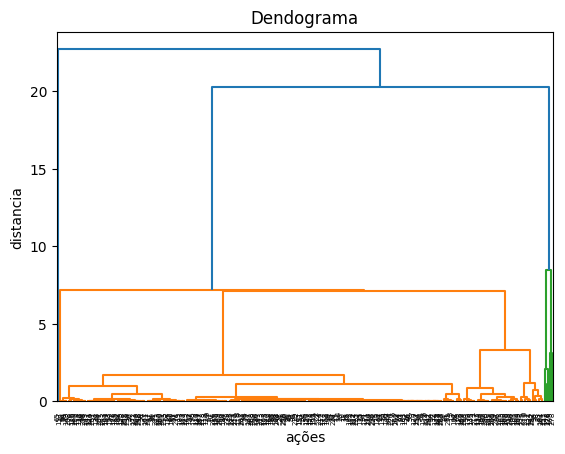

In [94]:
dendograma = dendrogram(linkage(base_cotacoes, method='ward'))
plt.title('Dendograma')
plt.xlabel('ações')
plt.ylabel('distancia')
plt.show()

com sklearn

In [95]:
from sklearn.cluster import AgglomerativeClustering

In [96]:
hc_cotas = AgglomerativeClustering(n_clusters=4, linkage='ward', affinity='euclidean')
rotulos = hc_cotas.fit_predict(base_cotacoes)

In [97]:
rotulos

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0],
      dtype=int64)

In [98]:
grafico_cluster = px.scatter(y=base_cotacoes[:,0], x=base_cotacoes[:,1], color=rotulos)
grafico_cluster.show()

In [99]:
grafico_c_rt = px.scatter(y=lista_lq, x=lista_vc, color=nome_rotulo)
grafico_c_rt.show()

################### preço cota com rendimento ##################

pegando as colunas do dataset

In [100]:
valor_cota = df['Preco_Atual']
rendimento_cota = df['Dividendo']

criando os eixos x e y

In [101]:
lista_rend = [] #liquidez_diaria
lista_vc = [] #preço atual
for rd, vc in zip(rendimento_cota,valor_cota):
    try:
        lista_rend.append(rd)
        lista_vc.append(vc)
    except:
        pass

juntando as informações em coordenadas

In [102]:
lista_cotacao = []
for x,y in zip(lista_rend, lista_vc):
    item = [x,y]
    lista_cotacao.append(item)

print(lista_cotacao)

[[0.0, 3.14], [0.0, 14.7], [0.0, 6.96], [0.0, 875.05], [0.0, 8.11], [1.38, 93.0], [0.22, 165.0], [0.25, 84.98], [0.48, 375.0], [0.0, 115.84], [0.0, 4.49], [0.0, 33.4], [1.62, 113.0], [9.16, 786.0], [0.64, 62.01], [0.0, 0.0], [0.0, 0.95], [0.0, 3.72], [0.32, 38.0], [0.17, 45.1], [10.76, 910.0], [5.4, 1000.0], [6.8, 1.08], [0.0, 81.59], [0.75, 92.79], [2.49, 243.01], [0.33, 87.12], [0.09, 12.79], [12.6, 1520.0], [0.1, 7.14], [0.0, 69.38], [0.0, 3.98], [0.86, 0.0], [0.18, 28.45], [0.15, 63.74], [0.17, 8.04], [0.61, 85.04], [0.3, 66.4], [1.25, 94.98], [0.63, 0.0], [0.91, 151.36], [1.25, 95.74], [0.76, 73.87], [0.65, 75.5], [1.35, 90.68], [0.85, 78.18], [0.52, 87.58], [1.3, 101.1], [0.75, 66.8], [1.15, 84.1], [0.77, 81.0], [1.02, 103.19], [1.5, 101.94], [1.06, 91.6], [1.17, 87.5], [0.8, 78.25], [0.65, 89.15], [1.25, 101.39], [1.1, 95.98], [0.74, 103.8], [1.4, 110.57], [0.83, 101.65], [1.3, 95.5], [1.1, 97.99], [1.1, 94.0], [783.96, 76000.0], [0.7, 107.39], [0.87, 125.76], [0.78, 116.33], [1

In [103]:
base_cotacoes = np.array(lista_cotacao)
scaler_base = StandardScaler()
base_cotacoes_rend = scaler_base.fit_transform(base_cotacoes)
base_cotacoes_rend

array([[-8.62056115e-02, -1.00839573e-01],
       [-8.62056115e-02, -9.83869190e-02],
       [-8.62056115e-02, -1.00029094e-01],
       [-8.62056115e-02,  8.41512386e-02],
       [-8.62056115e-02, -9.97851016e-02],
       [-5.65109428e-02, -8.17742175e-02],
       [-8.14716788e-02, -6.64981701e-02],
       [-8.08261425e-02, -8.34757994e-02],
       [-7.58770311e-02, -2.19430320e-02],
       [-8.62056115e-02, -7.69283158e-02],
       [-8.62056115e-02, -1.00553147e-01],
       [-8.62056115e-02, -9.44193900e-02],
       [-5.13466525e-02, -7.75308710e-02],
       [ 1.10898132e-01,  6.52577383e-02],
       [-7.24341709e-02, -8.83492829e-02],
       [-8.62056115e-02, -1.01505779e-01],
       [-8.62056115e-02, -1.01304220e-01],
       [-8.62056115e-02, -1.00716516e-01],
       [-7.93198912e-02, -9.34434203e-02],
       [-8.25475726e-02, -9.19370323e-02],
       [ 1.45326733e-01,  9.15664866e-02],
       [ 2.99909184e-02,  1.10661546e-01],
       [ 6.01159446e-02, -1.01276638e-01],
       [-8.

lembrando que já temos o setor

In [104]:
k_means_cotacao = KMeans(n_clusters=6)
k_means_cotacao.fit(base_cotacoes_rend)

KMeans(n_clusters=6)

In [105]:
centroides = k_means_cotacao.cluster_centers_
centroides

array([[-7.03851910e-02, -8.43012167e-02],
       [ 1.67829484e+01,  1.60232109e+01],
       [ 7.19638841e-01,  4.99029784e+00],
       [ 1.30658714e-01,  1.30074502e-01],
       [ 3.89124267e-01,  3.49880204e-01],
       [-1.51966210e-02,  6.69030959e-02]])

In [106]:
rotulos = k_means_cotacao.labels_
rotulos

array([0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 5,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [107]:
n_cluster = df['Setor']
n_cluster = set(n_cluster)
nome_cluster = n_cluster
for id, x in enumerate(nome_cluster):
    id_n = id+1
    print(id_n,x)

1 Logística
2 Outros
3 Títulos e Val. Mob.
4 Shoppings
5 Hospital
6 Hotel
7 Residencial
8 Híbrido
9 Lajes Corporativas


grafico por dividendos x valor da cota

## y = referece ao rendimento mensal, quanto maior e mais alta melhor
## x = referece ao valor da cota quanto mais a direita mais cara é

In [108]:
nome_rotulo = df['Codigo_do_fundo']
grafico_c_rt = px.scatter(y=lista_rend, x=lista_vc, color=nome_rotulo)
grafico_c_rt.show()

In [109]:
grafico_cluster = px.scatter(y=base_cotacoes_rend[:,0], x=base_cotacoes_rend[:,1], color=rotulos)
grafico_centroid = px.scatter(y=centroides[:,0], x=centroides[:,1], size=[2,3,4,5,6,7])
grafico_geral = go.Figure(data=grafico_cluster.data + grafico_centroid.data)
grafico_geral.show()

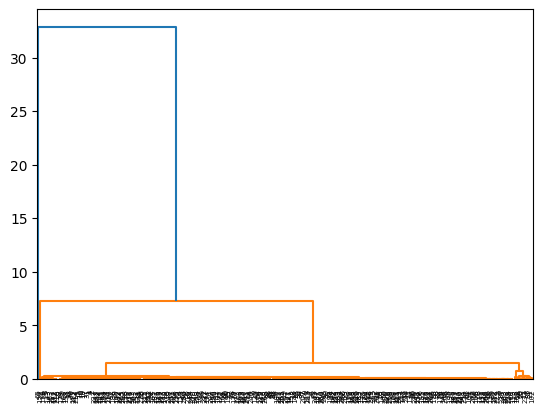

In [110]:
dendograma_rendimento = dendrogram(linkage(base_cotacoes_rend, method='ward'))

se imaginarmo uma linha entre 10 e 15 temos ali 3 linhas verticais

In [111]:
hc_rendimento = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
rotulo_hc = hc_rendimento.fit_predict(base_cotacoes_rend)

In [112]:
rotulo_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [113]:
grafico_cluster_rend = px.scatter(y=base_cotacoes_rend[:,0], x=base_cotacoes_rend[:,1], color=rotulo_hc)
grafico_cluster_rend.show()

vizualizando o csv que atende os requisitos

In [114]:
dataframe = df
dataframe

,Unnamed: 0,Codigo_do_fundo,Setor,Preco_Atual,Liquidez_Diária,Dividendo,DividendYield,DY_(3M)Acumulado,DY_(6M)Acumulado,DY_(12M)Acumulado,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab._Patr.no_Período,Rentab._Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,0,FIVN11,Shoppings,3.14,66915.0,0.00,0.00,0.00,0.00,0.00,...,65.531.708.68,6.96,45.0,0.00,0.00,0.00,0.00,56.00,0.0,1
1,1,BZLI11,Títulos e Val. Mob.,14.70,44041.0,0.00,0.00,0.00,0.00,0.00,...,440.205.505.76,10.78,136.0,0.00,0.00,0.00,0.00,0.00,0.0,0
2,2,XTED11,Lajes Corporativas,6.96,501.0,0.00,0.00,0.00,0.00,0.00,...,27.172.278.20,13.83,50.0,0.00,0.00,0.00,0.00,0.00,100.0,1
3,3,ALMI11,Lajes Corporativas,875.05,7.0,0.00,0.00,0.00,0.00,0.00,...,249.878.508.15,2.247.57,39.0,0.00,0.00,0.00,0.00,64.05,0.0,1
4,4,PABY11,Híbrido,8.11,87.0,0.00,0.00,0.00,0.00,0.00,...,-10.950.151.50,-14.44,-56.0,0.00,0.00,0.00,0.00,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,279,MGHT11,Hotel,68.86,3092.0,0.80,1.16,3.64,6.82,12.02,...,113.860.987.10,86.67,79.0,0.90,-10.30,-9.49,-7.85,0.00,0.0,0
280,280,MCCI11,Títulos e Val. Mob.,98.05,26991.0,1.10,1.12,3.37,6.48,12.40,...,1.411.454.086.46,96.71,101.0,1.14,-0.83,0.30,3.12,0.00,0.0,0
281,281,BRLA11,Híbrido,150.00,334.0,1.09,0.73,1.52,3.69,7.02,...,343.097.427.78,158.19,95.0,0.78,-12.35,-11.67,-10.88,0.00,0.0,0
282,282,MCHF11,Títulos e Val. Mob.,9.73,112072.0,0.11,1.13,3.66,7.01,0.00,...,312.636.898.43,9.68,101.0,1.24,-1.04,0.18,-2.08,0.00,0.0,0


In [115]:
n_cluster = df['Setor']
n_cluster = set(n_cluster)
nome_cluster = n_cluster
for id, x in enumerate(nome_cluster):
    print(x)

Logística
Outros
Títulos e Val. Mob.
Shoppings
Hospital
Hotel
Residencial
Híbrido
Lajes Corporativas


In [116]:
restricao_setor = 'Shoppings'
restricao_lq_diaria = 25000
filtro_df = dataframe[(dataframe.Preco_Atual <= 15) & (dataframe.Preco_Atual >= 8)]
# filtro_df = dataframe[(dataframe.Codigo_do_fundo == 'MXRF11')]
filtro_df

,Unnamed: 0,Codigo_do_fundo,Setor,Preco_Atual,Liquidez_Diária,Dividendo,DividendYield,DY_(3M)Acumulado,DY_(6M)Acumulado,DY_(12M)Acumulado,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab._Patr.no_Período,Rentab._Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
1,1,BZLI11,Títulos e Val. Mob.,14.70,44041.0,0.00,0.00,0.00,0.00,0.00,...,440.205.505.76,10.78,136.0,0.00,0.00,0.00,0.00,0.0,0.0,0
4,4,PABY11,Híbrido,8.11,87.0,0.00,0.00,0.00,0.00,0.00,...,-10.950.151.50,-14.44,-56.0,0.00,0.00,0.00,0.00,0.0,0.0,1
27,27,CTXT11,Lajes Corporativas,12.79,56.0,0.09,0.39,0.78,1.36,5.53,...,115.874.720.49,39.92,32.0,0.00,0.00,0.00,0.00,97.0,0.0,1
35,35,TORD11,Outros,8.04,86946.0,0.17,1.94,3.98,6.33,12.27,...,494.592.924.55,14.11,57.0,0.00,0.00,0.00,0.00,0.0,0.0,0
83,83,XPCA11,Títulos e Val. Mob.,10.44,75602.0,0.14,1.27,4.01,8.17,0.00,...,168.021.488.19,9.50,110.0,1.47,-0.19,1.28,9.33,0.0,0.0,0
100,100,ARRI11,Títulos e Val. Mob.,8.92,39962.0,0.11,1.17,3.82,7.93,16.47,...,108.835.561.27,92.37,10.0,1.42,-1.26,0.14,7.14,0.0,0.0,0
105,105,MXRF11,Híbrido,10.19,614388.0,0.11,1.07,3.32,6.63,11.99,...,2.302.693.543.19,10.19,100.0,0.98,-0.02,0.96,2.22,0.0,0.0,0
110,110,NVHO11,Hospital,10.06,2541.0,0.08,0.74,2.13,3.64,7.33,...,528.046.888.61,12.73,79.0,0.61,0.04,0.65,3.47,0.0,0.0,1
131,131,KINP11,Residencial,14.66,1907.0,0.21,1.45,6.39,13.32,0.00,...,42.851.422.47,5.99,245.0,4.43,-6.81,-2.68,10.06,0.0,0.0,0
132,132,APTO11,Híbrido,9.05,4723.0,0.11,1.17,3.70,7.11,0.00,...,40.476.276.61,10.09,90.0,1.19,-0.29,0.89,10.03,0.0,0.0,0
